In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

from google.colab import files

### Функции медианного фильтра

In [ ]:
def median_filter_native(img, ksize):
    """
    Нативная реализация медианного фильтра

    Для каждого пикселя:
    - берём окно ksize x ksize вокруг него,
    - считаем медиану по значениям в этом окне,
    - записываем в выходное изображение.
    """
    pad = ksize // 2
    h, w, c = img.shape
    out = np.zeros_like(img)

    # необходимо для корректной работы медианного фильтра на границах изображения (отзеркаливание)
    padded = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')

    for y in range(h):
        for x in range(w):
            window = padded[y:y+ksize, x:x+ksize]
            # медиана по каждому каналу
            for channel in range(c):
                    out[y, x, channel] = np.median(window[:, :, channel])
    return out


In [ ]:
uploaded = files.upload()

image_name = next(iter(uploaded.keys()))
print("Загружен файл:", image_name)

img = cv2.imdecode(np.frombuffer(uploaded[image_name], np.uint8), cv2.IMREAD_COLOR)

Saving 2.jpg to 2 (2).jpg
Загружен файл: 2 (2).jpg


### Визуализация результата

In [ ]:
def visualise(img_med_cv : np.ndarray, img_med_native : np.ndarray, ksize : np.ndarray):
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_med_cv_rgb = cv2.cvtColor(img_med_cv, cv2.COLOR_BGR2RGB)
  img_med_native_rgb = cv2.cvtColor(img_med_native, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(20, 10))

  plt.subplot(1, 3, 1)
  plt.title("Исходное")
  plt.imshow(img_rgb)
  plt.axis("off")

  plt.subplot(1, 3, 2)
  plt.title(f"OpenCV, k={ksize}")
  plt.imshow(img_med_cv_rgb)
  plt.axis("off")

  plt.subplot(1, 3, 3)
  plt.title(f"Нативно, k={ksize}")
  plt.imshow(img_med_native_rgb)
  plt.axis("off")

  plt.show()

### Cравнение по нескольким размерам ядра

In [ ]:
def process(ksize : int):
  print(f"Размер ядра медианного фильтра: {ksize}x{ksize}")

  # OpenCV
  start = time.perf_counter()
  img_med_cv = cv2.medianBlur(img, ksize)
  t_cv = time.perf_counter() - start
  print(f"Время фильтрации (OpenCV): {t_cv:.6f} с")

  # Нативная реализация
  start = time.perf_counter()
  img_med_native = median_filter_native(img, ksize)
  t_native = time.perf_counter() - start
  print(f"Время фильтрации (нативный Python): {t_native:.6f} с")

  speedup = t_native / t_cv if t_cv > 0 else float('inf')
  print(f"OpenCV быстрее нативной реализации примерно в {speedup:.2f} раз")

  visualise(img_med_cv, img_med_native, ksize)

Размер ядра медианного фильтра: 3x3
Время фильтрации (OpenCV): 0.000973 с
Время фильтрации (нативный Python): 20.209195 с
OpenCV быстрее нативной реализации примерно в 20764.22 раз


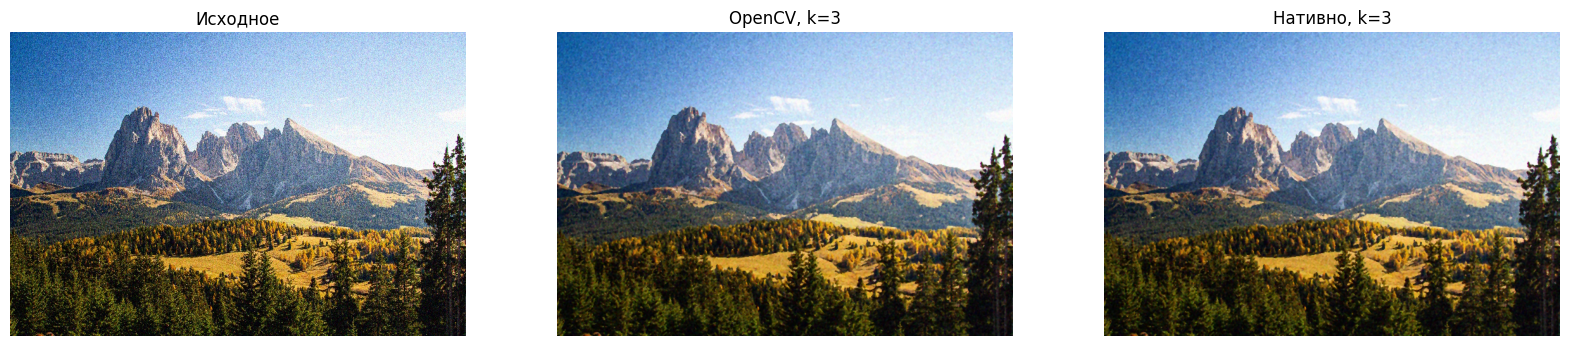

Размер ядра медианного фильтра: 5x5
Время фильтрации (OpenCV): 0.005010 с
Время фильтрации (нативный Python): 21.463410 с
OpenCV быстрее нативной реализации примерно в 4284.27 раз


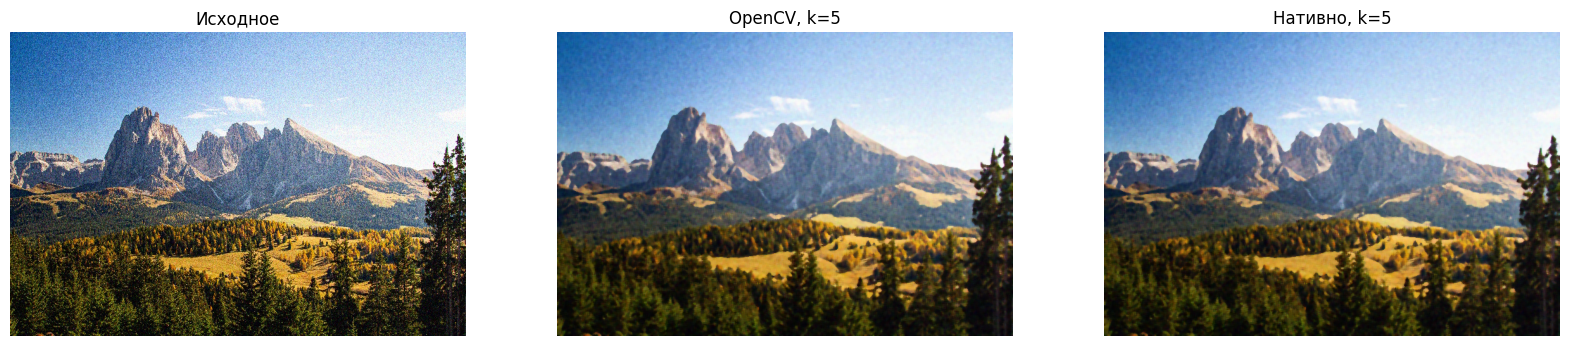

Размер ядра медианного фильтра: 7x7
Время фильтрации (OpenCV): 0.086339 с
Время фильтрации (нативный Python): 20.650846 с
OpenCV быстрее нативной реализации примерно в 239.18 раз


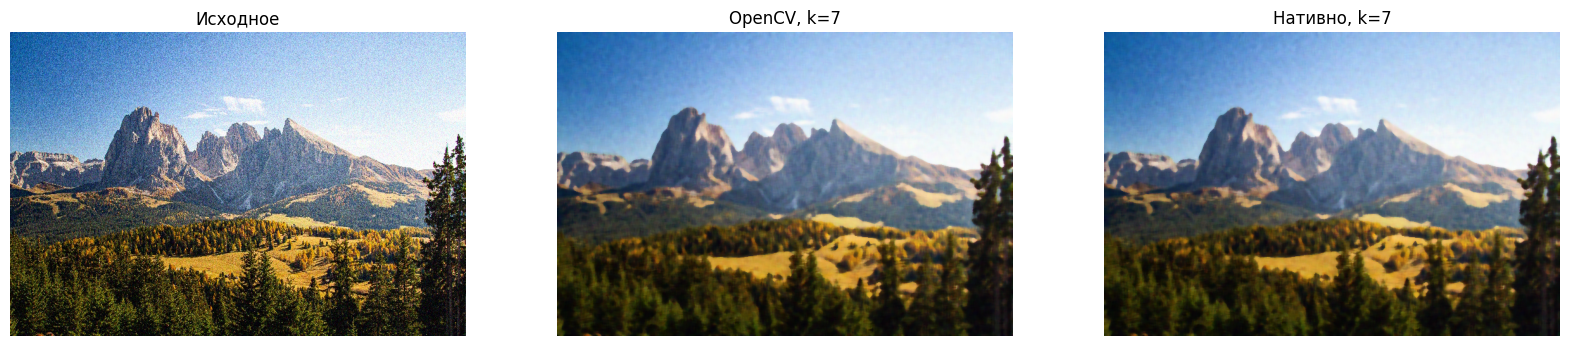

Размер ядра медианного фильтра: 9x9
Время фильтрации (OpenCV): 0.116544 с
Время фильтрации (нативный Python): 22.400842 с
OpenCV быстрее нативной реализации примерно в 192.21 раз


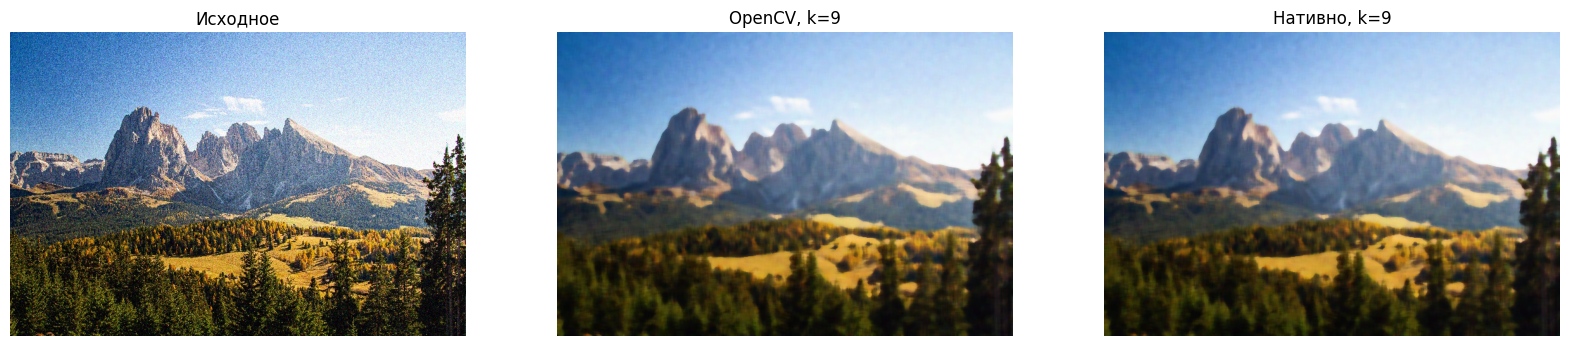

In [ ]:
process(3)
process(5)
process(7)
process(9)